In [1]:
import pandas as pd 
import os 

cwd = os.getcwd()
data = pd.read_csv(cwd + "/kc-house-data.csv")
df = data.copy()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
import statsmodels.api as sm
X = df.drop(["price","date"],axis=1)
y = df[["price"]]
X = sm.add_constant(X) 
sme = sm.OLS(y,X)
model = sme.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2797.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        20:12:25   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21594   BIC:                         5.894e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.939e+06   2.93e+06      2.366      0.018    1.19e+06    1.27e+07
id            -1.289e-06   4.82e-07     -2.671      0.008   -2.23e-06   -3.43e-07
bedrooms      -3.576e+04   1891.574    -18.907      0.000   -3.95e+04   -3.21e+04
bathrooms      4.116e+04   3253.218     12.651      0.000    3.48e+04    4.75e+04
sqft_living     110.3960      2.269     48.647      0.000     105.948     114.844
sqft_lot          0.1218      0.048      2.539      0.011       0.028       0.216
floors         6764.7563   3595.459      1.881      0.060    -282.608    1.38e+04
waterfront     5.827e+05   1.74e+04     33.567      0.000    5.49e+05    6.17e+05
view           5.303e+04   2140.594     24.774      0.000    4.88e+04    5.72e+04
condition      2.625e+04   2351.639     11.164      0.000    2.16e+04    3.09e+04
grade          9.601e+04   2152.926     44.594      0.000    9.18e+04       1e+05
sqft_above       70.6913      2.253     31.372      0.000      66.275      75.108
sqft_basement    39.7078      2.646     15.006      0.000      34.521      44.895
yr_built      -2622.2522     72.653    -36.093      0.000   -2764.657   -2479.847
yr_renovated     19.6458      3.656      5.374      0.000      12.481      26.811
zipcode        -582.2481     32.981    -17.654      0.000    -646.894    -517.603
lat            6.024e+05   1.07e+04     56.115      0.000    5.81e+05    6.23e+05
long          -2.128e+05   1.32e+04    -16.179      0.000   -2.39e+05   -1.87e+05
sqft_living15    21.6256      3.447      6.273      0.000      14.869      28.383
sqft_lot15       -0.3964      0.073     -5.398      0.000      -0.540      -0.252
==============================================================================
Omnibus:                    18406.018   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1881616.153
Skew:                           3.571   Prob(JB):                         0.00
Kurtosis:                      48.149   Cond. No.                     3.42e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.42e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

,Model Names,Train,Test
0,KNR,0.857467,0.770243
1,GBR,0.902029,0.855211
2,LASSO,0.700977,0.696664
3,RIDGE,0.700977,0.696662


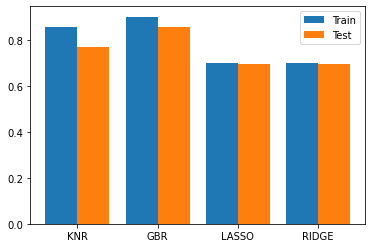

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from warnings import filterwarnings
filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def model(X,y):
    knr = KNeighborsRegressor()
    gbr = GradientBoostingRegressor()
    lasso = Lasso()
    ridge = Ridge()
    mlpr = MLPRegressor()
    ss = StandardScaler()
    models = [knr,gbr,lasso,ridge]
    model_names = ["KNR","GBR","LASSO","RIDGE"]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test) 
    r2_scores_train = []
    r2_scores_test = []

    for i in models:
        model= i.fit(X_train,y_train)
        pre_train = model.predict(X_train)
        pre_test = model.predict(X_test)
        r2_scores_train.append(r2_score(y_train,pre_train))
        r2_scores_test.append(r2_score(y_test,pre_test))

    xpos = np.arange(len(models))
    plt.bar(xpos-0.2,r2_scores_train,width=0.4,label="Train")
    plt.bar(xpos+0.2,r2_scores_test,width=0.4,label="Test")
    plt.xticks(xpos,model_names)
    plt.legend()

    results = {"Model Names":model_names,
                "Train":r2_scores_train,
                "Test":r2_scores_test}
    results = pd.DataFrame(results)
    return results

model(X,y)
    

In [6]:
from sklearn.model_selection import GridSearchCV
parameters  = {"n_estimators":[70,90,100],"criterion":("friedman_mse", "mse", "mae")}
model = GradientBoostingRegressor()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
gre = GridSearchCV(model,parameters,cv=10)
gre.fit(X_train,y_train)
gre.best_params_